# KMeans

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

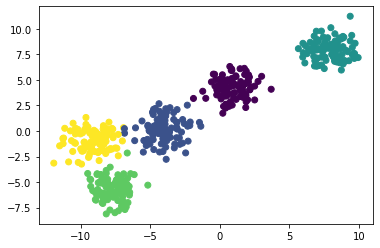

In [3]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
k = 5
color = ["green","red","yellow","blue","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        "center":center,
        "points":points,
        "color":color[i]
    }

    clusters[i] = cluster


In [5]:
print(clusters)

{0: {'center': array([-0.53948567, -4.99002492]), 'points': [], 'color': 'green'}, 1: {'center': array([-4.0003705 ,  3.05827539]), 'points': [], 'color': 'red'}, 2: {'center': array([-4.4061116, -3.7088346]), 'points': [], 'color': 'yellow'}, 3: {'center': array([-8.86629643,  0.72809729]), 'points': [], 'color': 'blue'}, 4: {'center': array([-4.2499521,  7.7633045]), 'points': [], 'color': 'orange'}}


In [6]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def assignPointsToCluster(clusters):
    for i in range(X.shape[0]):
        clust_x = X[i]
        dist = []
        for kx in range(k):
            d = distance(clust_x,clusters[kx]['center'])
            dist.append(d)
        
        idx = np.argmin(dist)
        clusters[idx]['points'].append(clust_x)

def updateCluster(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        if(pts.shape[0]>0):
            new_centers = np.mean(pts,axis=0)
            clusters[kx]['center'] = new_centers
            clusters[kx]['points'] = []

def plotClusters(clusters):

    plt.figure()
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass

        cent = clusters[kx]['center']
        plt.scatter(cent[0],cent[1],color='black',marker="*")

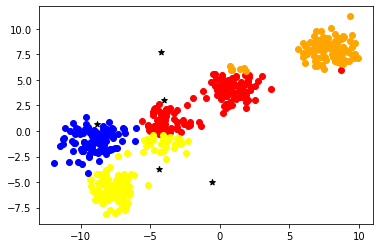

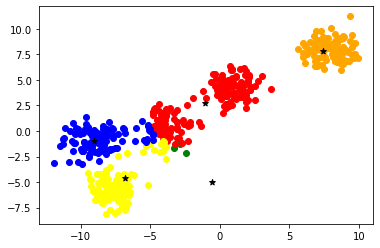

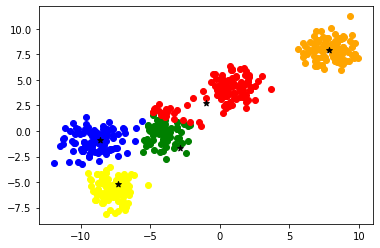

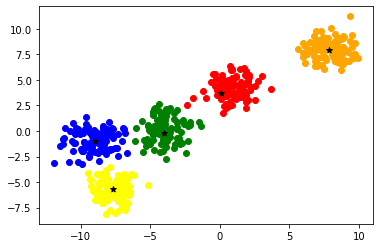

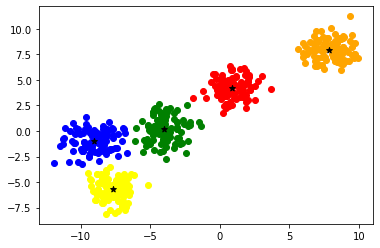

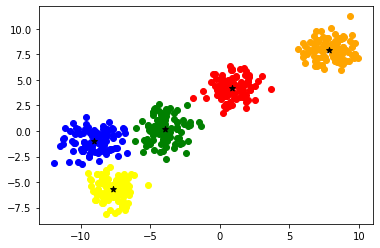

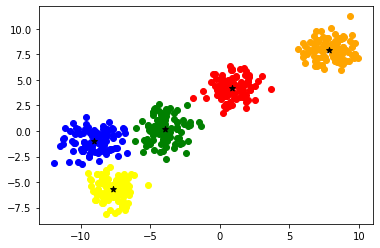

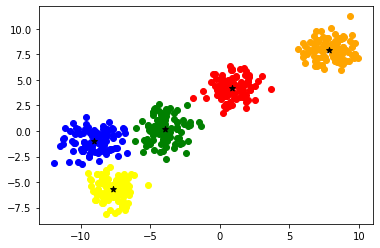

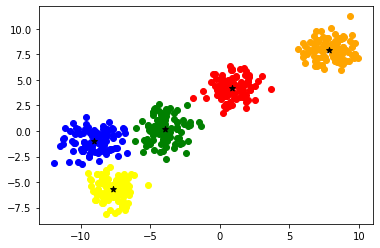

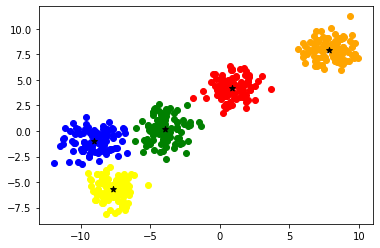

In [7]:
epoch = 10
for i in range(epoch):
    assignPointsToCluster(clusters)
    plotClusters(clusters)
    updateCluster(clusters)